In [5]:
import sys
!{sys.executable} -m pip install alpha_vantage

  Using cached https://files.pythonhosted.org/packages/7a/6c/81c7f1c58064cb2ce808edc6c4cdb3241f70bf8cd158289540cdf9fe0204/alpha_vantage-2.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/1b/b853c7a9d4f6a6d00749e94eb6f3a041e342a885b87340b79c1ef73e3a78/certifi-2019.6.16-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d62811ba7f273d0e58972d75e58a94d329d51550a47d/urllib3-1.25.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Running setup.py bdist_wheel for alpha-vantage ... done
  Stor

In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib
import matplotlib.pyplot as plt
import os
from pprint import pprint
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
API_KEY = 'OIOFADOM1RW053KF'

In [3]:
ts = TimeSeries(key=API_KEY, output_format='pandas')

In [4]:
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

In [9]:
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,137.524252,137.554162,137.492880,137.522505,45504.189119
std,1.253166,1.248609,1.257058,1.252794,54910.036609
min,134.714200,134.740000,134.670000,134.715000,2037.000000
25%,136.940000,136.970000,136.915000,136.935000,21778.250000
50%,137.390100,137.430000,137.365000,137.390000,33912.500000
75%,138.760000,138.780000,138.740000,138.760000,52068.500000
max,139.341000,139.540000,139.250000,139.310000,842265.000000


In [12]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-12 09:31:00,138.85,138.95,138.70,138.8000,518633.0
2019-07-12 09:32:00,138.81,138.95,138.74,138.9450,62986.0
2019-07-12 09:33:00,138.96,139.00,138.91,138.9118,120996.0
2019-07-12 09:34:00,138.90,139.00,138.83,138.9800,72908.0
2019-07-12 09:35:00,138.97,139.00,138.80,138.8901,81043.0


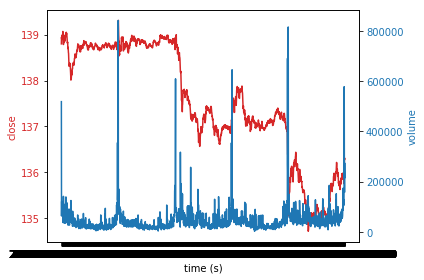

In [28]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('close', color=color)
ax1.plot(data.index.values, data['4. close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index.values, data['5. volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [32]:
cc = ForeignExchange(key=API_KEY)

In [37]:
data, _ = cc.get_currency_exchange_rate(from_currency='AUD',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'AUD',
 '2. From_Currency Name': 'Australian Dollar',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '0.70190000',
 '6. Last Refreshed': '2019-07-13 13:32:47',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '0.70150000',
 '9. Ask Price': '0.70240000'}


In [38]:
data, _ = cc.get_currency_exchange_rate(from_currency='AUD',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'AUD',
 '2. From_Currency Name': 'Australian Dollar',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '0.70190000',
 '6. Last Refreshed': '2019-07-13 13:32:53',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '0.70150000',
 '9. Ask Price': '0.70240000'}
